In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('datafiles/Survived.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 11)

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
col = ['Pclass','Age','SibSp','Parch','Fare']

In [10]:
x = df[col]

In [11]:
t = df['Survived']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [13]:
x_train.shape

(712, 5)

In [14]:
model = tree.DecisionTreeClassifier(max_depth=5,random_state = 0, class_weight = 'balanced')

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [16]:
model.score(x_test,y_test)

0.7374301675977654

In [18]:
def learn(x,t,depth):
    x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=0)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state=0, class_weight='balanced')
    model.fit(x,t)
    
    score1 = model.score(x_test,y_test)
    score2 = model.score(x_train,y_train)
    
    return score1,score2,model

In [24]:
for i in range(1,30):
    test_score,train_score,model = learn(x,t,depth=i)
    sentence  = 'train:{}'
    sentence2 = 'test:{} '
    
    total_sentence = 'depth{} '+sentence2+sentence
    print(total_sentence.format(i,test_score,train_score))

depth1 test:0.7039106145251397 train:0.6587078651685393
depth2 test:0.7374301675977654 train:0.7036516853932584
depth3 test:0.7430167597765364 train:0.7162921348314607
depth4 test:0.770949720670391 train:0.7078651685393258
depth5 test:0.770949720670391 train:0.7317415730337079
depth6 test:0.7988826815642458 train:0.7556179775280899
depth7 test:0.8491620111731844 train:0.7612359550561798
depth8 test:0.8491620111731844 train:0.7837078651685393
depth9 test:0.8324022346368715 train:0.7963483146067416
depth10 test:0.8770949720670391 train:0.8384831460674157
depth11 test:0.9050279329608939 train:0.8778089887640449
depth12 test:0.8994413407821229 train:0.8890449438202247
depth13 test:0.8994413407821229 train:0.9002808988764045
depth14 test:0.9106145251396648 train:0.901685393258427
depth15 test:0.9273743016759777 train:0.925561797752809
depth16 test:0.9162011173184358 train:0.9353932584269663
depth17 test:0.9385474860335196 train:0.9410112359550562
depth18 test:0.9441340782122905 train:0.9466

In [26]:
df.groupby('Survived').mean()['Age']

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [27]:
df.groupby('Pclass').mean()['Age']

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [28]:
pd.pivot_table(df,index = 'Survived',columns = 'Pclass',values = 'Age')

Pclass,1,2,3
Survived,,,
0,40.896074,33.266947,27.417500
1,34.784615,26.076166,23.232689


In [32]:
#TorFの一次ベクトル
is_null = df['Age'].isnull()

In [33]:
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 0) & (is_null),'Age'] = 40

In [34]:
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1) & (is_null),'Age'] = 34

In [35]:
df.loc[(df['Pclass'] == 2) & (df['Survived'] == 0) & (is_null),'Age'] = 33

In [36]:
df.loc[(df['Pclass'] == 2) & (df['Survived'] == 1) & (is_null),'Age'] = 26

In [37]:
df.loc[(df['Pclass'] == 3) & (df['Survived'] == 0) & (is_null),'Age'] = 27

In [38]:
df.loc[(df['Pclass'] == 3) & (df['Survived'] == 1) & (is_null),'Age'] = 23

In [39]:
col = ['Pclass','Age','SibSp','Parch','Fare']
x= df[col]
t = df['Survived']

In [40]:
for i in range(1,16):
    s1,s2,m = learn(x,t,i)
    sentence = 'depth:{} train:{} test:{}'
    print(sentence.format(i,s1,s2))

depth:1 train:0.7039106145251397 test:0.6587078651685393
depth:2 train:0.7374301675977654 test:0.7036516853932584
depth:3 train:0.7430167597765364 test:0.7162921348314607
depth:4 train:0.770949720670391 test:0.7078651685393258
depth:5 train:0.770949720670391 test:0.7317415730337079
depth:6 train:0.7988826815642458 test:0.7556179775280899
depth:7 train:0.8491620111731844 test:0.7612359550561798
depth:8 train:0.8491620111731844 test:0.7837078651685393
depth:9 train:0.8324022346368715 test:0.7963483146067416
depth:10 train:0.8770949720670391 test:0.8384831460674157
depth:11 train:0.9050279329608939 test:0.8778089887640449
depth:12 train:0.8994413407821229 test:0.8890449438202247
depth:13 train:0.8994413407821229 test:0.9002808988764045
depth:14 train:0.9106145251396648 test:0.901685393258427
depth:15 train:0.9273743016759777 test:0.925561797752809


In [41]:
sex = df.groupby('Sex').mean()

In [42]:
sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


<AxesSubplot:xlabel='Sex'>

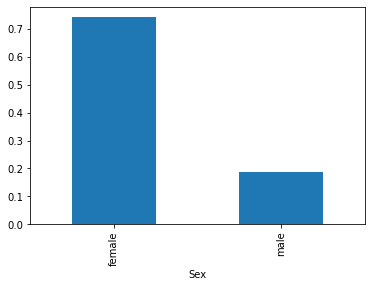

In [43]:
sex['Survived'].plot(kind = 'bar')

In [45]:
male = pd.get_dummies(df['Sex'],drop_first = True)

In [46]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [47]:
x_temp = pd.concat([x,male],axis = 1)

In [48]:
x_temp.head()


,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [51]:
for i in range(1,16):
    s1,s2,m = learn(x_temp,t,depth=i)
    s = 'depth:{} train:{} test:{}'
    print(s.format(i,s1,s2))

depth:1 train:0.7877094972067039 test:0.7865168539325843
depth:2 train:0.7877094972067039 test:0.7865168539325843
depth:3 train:0.8268156424581006 test:0.7780898876404494
depth:4 train:0.8379888268156425 test:0.8398876404494382
depth:5 train:0.8547486033519553 test:0.8089887640449438
depth:6 train:0.8659217877094972 test:0.8665730337078652
depth:7 train:0.8659217877094972 test:0.8792134831460674
depth:8 train:0.888268156424581 test:0.8974719101123596
depth:9 train:0.9217877094972067 test:0.8862359550561798
depth:10 train:0.9441340782122905 test:0.9171348314606742
depth:11 train:0.9441340782122905 test:0.9339887640449438
depth:12 train:0.9553072625698324 test:0.949438202247191
depth:13 train:0.9553072625698324 test:0.9564606741573034
depth:14 train:0.9608938547486033 test:0.9662921348314607
depth:15 train:0.9664804469273743 test:0.973314606741573


In [53]:
model.feature_importances_

array([0.1362867 , 0.40441702, 0.08382678, 0.03430227, 0.34116722])

In [55]:
pd.DataFrame(model.feature_importances_,index = x.columns)

,0
Pclass,0.136287
Age,0.404417
SibSp,0.083827
Parch,0.034302
Fare,0.341167
